In [1]:
from gradient_descent import gradient_descent
from one_dimensional import dichotomy_method, fibonacci_method, golden_ratio_method
import matplotlib.pyplot as plt
import numpy as np
import itertools
from math import ceil, floor

In [31]:
f = lambda x: (x - 3) ** 2 + 8
f_grad = lambda x: 2 * (x - 3)
    
start_arg = 0
methods = [dichotomy_method, golden_ratio_method, fibonacci_method]

for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method, pb=True criterion=3, max_iterations=100000, step=None, eps=1e-6)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

  0%|          | 2/100000 [00:00<00:27, 3651.98it/s]

method: dichotomy_method result: 2.9999994677948676 iterations: 100001
method: golden_ratio_method result: 2.999999970197588 iterations: 4
method: fibonacci_method result: 2.9999999701976696 iterations: 4


In [42]:
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)
    
res = gradient_descent(f, f_grad, start_arg, pb=True method=None, criterion=1, max_iterations=100000, step=1e-9, eps=1e-5)
print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

  0%|          | 117/100000 [00:00<00:02, 35843.52it/s]

method: fibonacci_method result: -3.895725894572838 iterations: 119


In [43]:
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)
    
for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method, pb=True, criterion=1, max_iterations=100000, step=None, eps=1e-5)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')

  8%|▊         | 7893/100000 [00:00<00:02, 39226.26it/s]

method: dichotomy_method result: -3.9923943806356865 iterations: 100001


  6%|▌         | 5872/100000 [00:00<00:03, 28853.15it/s]

method: golden_ratio_method result: -3.9923943806356865 iterations: 100001


100%|██████████| 100000/100000 [00:03<00:00, 28764.76it/s]

method: fibonacci_method result: -3.9923943806356865 iterations: 100001


In [60]:
def make_level_lines_plot(f, f_grad, start, method, x_min, x_max, y_min, y_max, levels, x_step=0.1, y_step=0.1):
    trace = gradient_descent(f, f_grad, start, method, pb=True)
    print(f'result: {trace[-1]}', f'iterations: {len(trace)}')
    if levels is None:
        levels = [f(args) for args in trace]
        list.sort(levels)
        
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    plt.clabel(cs)
    
    colors = itertools.cycle(["r", "g", "b"])
    plt.scatter([trace[0][0]], [trace[0][1]], color=next(colors))
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([next_point[0]], [next_point[1]], color=next(colors))
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], color="cyan")
    last_point = trace[-1]
    plt.scatter([last_point[0]], [last_point[1]], color="cyan")
    plt.grid()
    plt.show()

In [45]:
sum_squares_f = lambda args: np.sum(args ** 2)
sum_squares_grad = lambda args: 2 * args

  0%|          | 2/10000 [00:00<00:17, 573.85it/s]


result: [6.42566077e-15 6.42566077e-15] iterations: 4


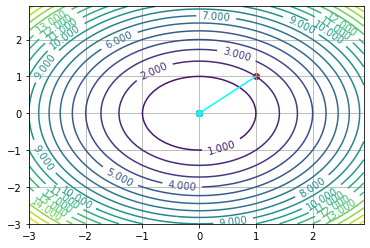

In [62]:
make_level_lines_plot(sum_squares_f,
              sum_squares_grad,
              start=np.array([1, 1]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3,
              levels = 20
             )

In [63]:
def some_f(arg):
    x = arg[0]
    y = arg[1]
    return (x - 2) ** 2 + (y - 1) ** 2

def some_f_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (x - 2)
    dy = 2 * (y - 1)
    return np.array([dx, dy])

  0%|          | 2/10000 [00:00<00:19, 511.41it/s]


result: [2. 1.] iterations: 4


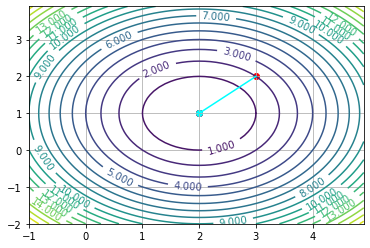

In [64]:
make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=5,
              y_min=-2,
              y_max=4,
              levels=20
             )

  1%|          | 91/10000 [00:00<00:01, 6812.34it/s]


result: [1.00013652 1.00013979] iterations: 93


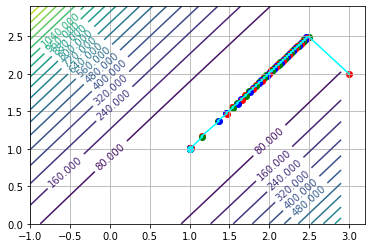

In [67]:
def another_f(args):
    x = args[0]
    y = args[1]
    return 100 * (y - x) ** 2 + (1 - x) ** 2

def another_f_grad(args):
    x = args[0]
    y = args[1]
    return np.array([-200 * (y - x) + 2 * x - 2, 200 * (y - x)])

make_level_lines_plot(another_f,
              another_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=3,
              y_min=0,
              y_max=3,
              levels=20
             )

  4%|▎         | 355/10000 [00:00<00:01, 5925.86it/s]


result: [0.9999946  0.99428203] iterations: 357


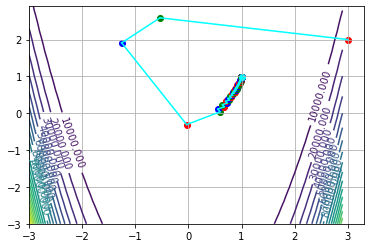

In [66]:
def some_f(args):
    x = args[0]
    y = args[1]
    return 10 * (y - x ** 2) ** 4 + (1 - x) ** 2

def some_f_grad(args):
    x = args[0]
    y = args[1]
    return np.array([2 * (-40 * x * (y - x ** 2) ** 3 + x - 1), 40 * (y - x ** 2) ** 3])

make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3,
              levels=20
             )